<a href="https://colab.research.google.com/github/NishithaThimmappa/Coursera_projects/blob/main/Face_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Face Detection

- Face detection is a computer vision problem for identifying and localizing faces in images.
- Face detection can be performed using the classical feature-based cascade classifier using the OpenCV library.
- State-of-the-art face detection can be achieved using a Multi-task Cascade CNN via the MTCNN library.

**Face Detection With OpenCV**

Feature-based face detection algorithms are fast and effective and have been used successfully for decades.

Perhaps the most successful example is a technique called cascade classifiers first described by Paul Viola and Michael Jones and their 2001 paper titled[ “Rapid Object Detection using a Boosted Cascade of Simple Features.”](https://ieeexplore.ieee.org/document/990517)

In [ ]:
pip install opencv-python

In [ ]:
import cv2
print(cv2.__version__)

4.1.2


In [ ]:
classifier = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

In [ ]:
pixels=cv2.imread('/content/test1.jpg')


In [ ]:
bboxes=classifier.detectMultiScale(pixels)

In [ ]:
from google.colab.patches import cv2_imshow

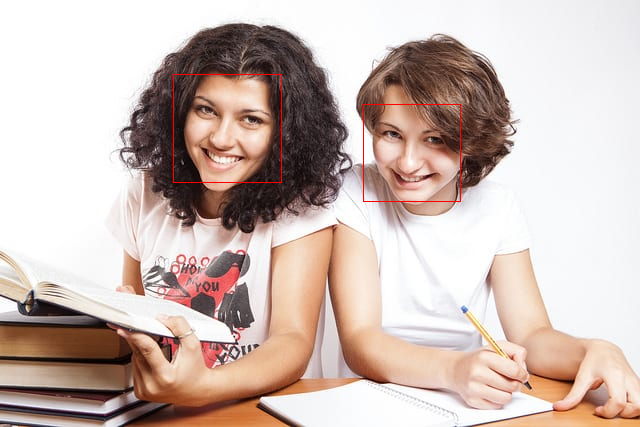

In [ ]:
for box in bboxes:
  x, y, width, height= box
  x2, y2=x+width, y+height
  cv2.rectangle(pixels, (x,y), (x2,y2), (0,0,255), 1)

cv2_imshow(pixels)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
pixels=cv2.imread('/content/test2.jpg')

In [ ]:
bboxes = classifier.detectMultiScale(pixels, 1.05, 8)

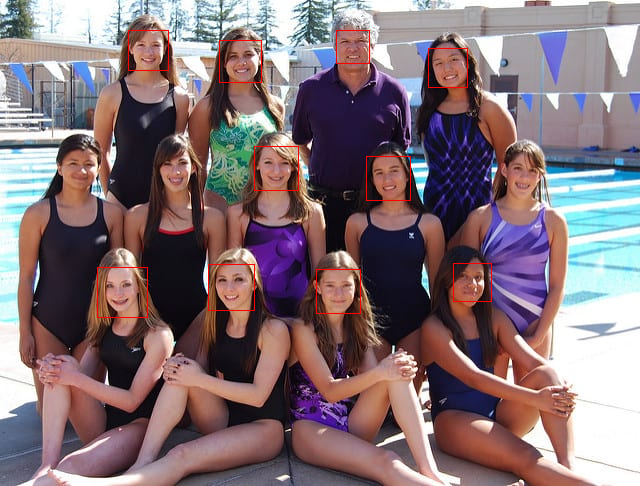

In [ ]:
for box in bboxes:
  x, y, width, height= box
  x2, y2=x+width, y+height
  cv2.rectangle(pixels, (x,y), (x2,y2), (0,0,255), 1)

cv2_imshow(pixels)
cv2.waitKey(0)
cv2.destroyAllWindows()

**Face Detection With Deep Learning**

The MTCNN is popular because it achieved then state-of-the-art results on a range of benchmark datasets, and because it is capable of also recognizing other facial features such as eyes and mouth, called landmark detection.

[“Joint Face Detection and Alignment Using Multitask Cascaded Convolutional Networks.”](https://arxiv.org/abs/1604.02878)

In [1]:
pip install mtcnn

     |████████████████████████████████| 2.3 MB 5.1 MB/s 


In [2]:
pip show mtcnn


Name: mtcnn
Version: 0.1.1
Summary: Multi-task Cascaded Convolutional Neural Networks for Face Detection, based on TensorFlow
Home-page: http://github.com/ipazc/mtcnn
Author: Iván de Paz Centeno
Author-email: ipazc@unileon.es
License: MIT
Location: /usr/local/lib/python3.7/dist-packages
Requires: keras, opencv-python
Required-by: 


In [3]:
import mtcnn
print(mtcnn.__version__)

0.1.0


In [5]:
import matplotlib.pyplot as plt
from mtcnn.mtcnn import MTCNN

In [6]:
pixels=plt.imread('/test1.jpg')

In [7]:
detector=MTCNN()

In [8]:
faces=detector.detect_faces(pixels)
for face in faces:
  print(face)

{'box': [373, 83, 100, 129], 'confidence': 0.9998095631599426, 'keypoints': {'left_eye': (392, 132), 'right_eye': (436, 139), 'nose': (403, 171), 'mouth_left': (390, 171), 'mouth_right': (438, 177)}}
{'box': [185, 68, 91, 118], 'confidence': 0.9993304014205933, 'keypoints': {'left_eye': (208, 110), 'right_eye': (252, 119), 'nose': (220, 143), 'mouth_left': (200, 148), 'mouth_right': (245, 159)}}


In [19]:
from matplotlib.patches import Rectangle, Circle
def draw_image_with_boxes(filename, result_list):
  data=plt.imread(filename)
  plt.imshow(data)
  ax=plt.gca()
  for result in result_list:
    x,y, width, height=result['box']
    rect=Rectangle((x,y),width, height, fill=False, color='red')
    ax.add_patch(rect)
    for key, value in result['keypoints'].items():
      dot=Circle(value, radius=2, color='red')
      ax.add_patch(dot)
  plt.show()

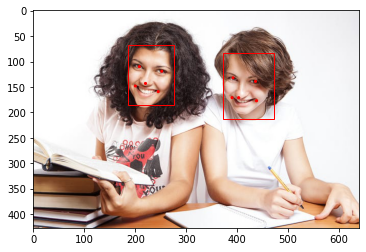

In [20]:
filename='/test1.jpg'
pixels=plt.imread(filename)
detector=MTCNN()
faces=detector.detect_faces(pixels)
draw_image_with_boxes(filename, faces)

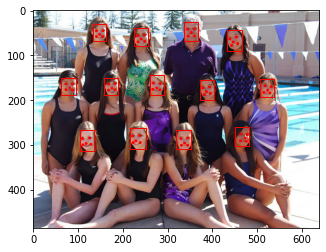

In [21]:
filename='/test2.jpg'
pixels=plt.imread(filename)
detector=MTCNN()
faces=detector.detect_faces(pixels)
draw_image_with_boxes(filename, faces)

In [25]:
def draw_faces(filenmae, result_list):
  data=plt.imread(filename)
  for i in range(len(result_list)):
    x1, y1, width, height=result_list[i]['box']
    x2, y2=x1+width, y1+height
    plt.subplot(1, len(result_list), i+1)
    plt.axis('off')
    plt.imshow(data[y1:y2, x1:x2])
  plt.show()


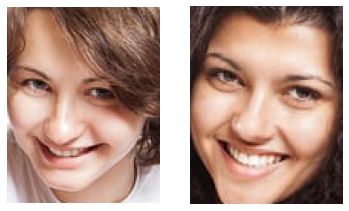

In [26]:
filename='/test1.jpg'
pixels=plt.imread(filename)
detector=MTCNN()
faces=detector.detect_faces(pixels)
draw_faces(filename, faces)

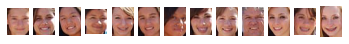

In [27]:
filename='/test2.jpg'
pixels=plt.imread(filename)
detector=MTCNN()
faces=detector.detect_faces(pixels)
draw_faces(filename, faces)